# Librosa Tutorial

In diesen Notebook wird an einem Beispiel erklärt, wie mit der Librosa Bibliothek flac Dateien eingelesen und verarbeitet werden können. Dabei wird zu Beginn eine Liste erstellt, die jeden einzelnen Abtastpunkt des Audiosignals enthält. Mithilfe dieser Liste werden Anschließend verschiedene Spektogramme erzeugt
- [Original Tutorial](https://librosa.org/doc/latest/tutorial.html)
- weitere Funktionen: https://librosa.org/doc/latest/feature.html

In [2]:
import librosa
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
np.set_printoptions(precision=4, suppress=True)

## Audio Datei laden

- `waveform`: Enthält die Werte für jeden Abtastpunkt des Audiosignals in zeitlicher korrekter Reihenfolge
    - eindimesionales NumPy float array
- `sampling_rate`: Speichert die Abtastrate der Audiosignals. Diese gibt an wie viele Abtaspunkte bei der Erstellung des Audiosignals pro Sekunde erstellt werden 
    - default: 22,050 Hz mono

In [3]:
waveform, sampling_rate = librosa.load('../data/Atlas_3_1.flac')

In [4]:
print(waveform)
print(sampling_rate)

[-0.028  -0.0399 -0.0318 ...  0.0076  0.0084  0.0059]
22050


## Verarbeitung der Daten

in den folgenden Abschnitten, werden aus den Waveform Daten unterschiedliche Spektogramme erstellt

### Kurzzeit-Fourier-Transformation

https://librosa.org/doc/latest/generated/librosa.feature.chroma_stft.html

In [5]:
stft = np.abs(librosa.stft(waveform))

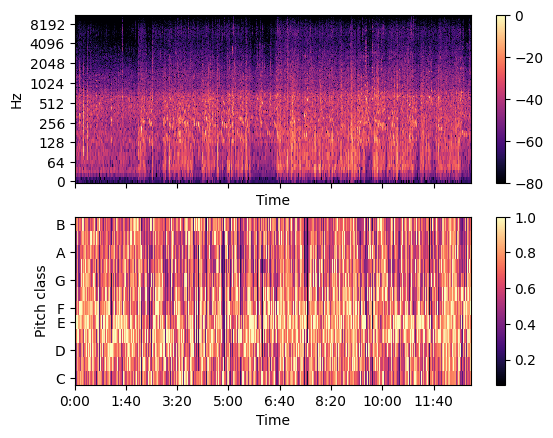

In [6]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), y_axis='log', x_axis='time', ax=ax[0])

chroma = librosa.feature.chroma_stft(S=stft, sr=sampling_rate)

fig.colorbar(img, ax=ax[0])
ax[0].label_outer()

img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img, ax=ax[1])

### MFCC

Die Mel Frequency Cepstral Coefficients (MFCC; deutsch Mel-Frequenz-Cepstrum-Koeffizienten) werden zur automatischen Spracherkennung verwendet. Sie führen zu einer kompakten Darstellung des Frequenzspektrums. Das Mel im Namen beschreibt die wahrgenommene Tonhöhe. 

- `hop_length`: Anzahl an Abtastpunken zwischen aufeinander folgenden Fenstern

https://librosa.org/doc/latest/generated/librosa.feature.mfcc.html

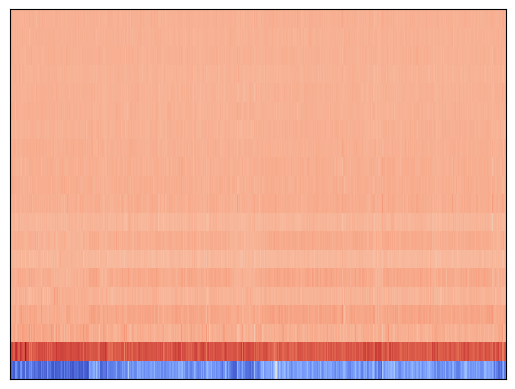

In [7]:
# Set the hop length; at 22050 Hz, 512 samples ~= 23ms
hop_length = 512

mfcc = librosa.feature.mfcc(y=waveform, sr=sampling_rate, hop_length=hop_length)

librosa.display.specshow(mfcc)

### Chroma STFT

Die Kurzzeit-Fourier-Transformation (englisch short-time Fourier transform, kurz STFT) ist eine Methode aus der Fourier-Analysis, um die zeitliche Änderung des Frequenzspektrums eines Signals darzustellen.

https://librosa.org/doc/latest/generated/librosa.feature.chroma_stft.html

In [8]:
chroma_stft = librosa.feature.chroma_stft(y=waveform, hop_length=hop_length)
chroma_stft

array([[0.0344, 0.0246, 0.0247, ..., 0.0089, 0.0223, 0.0544],
       [0.0747, 0.0566, 0.0515, ..., 0.007 , 0.0098, 0.0408],
       [0.0266, 0.0088, 0.0046, ..., 0.0054, 0.0102, 0.0534],
       ...,
       [0.0175, 0.0105, 0.0129, ..., 1.    , 1.    , 1.    ],
       [0.0315, 0.0191, 0.0203, ..., 0.6539, 0.4979, 0.6206],
       [0.0123, 0.0039, 0.0034, ..., 0.0637, 0.0518, 0.1703]],
      dtype=float32)

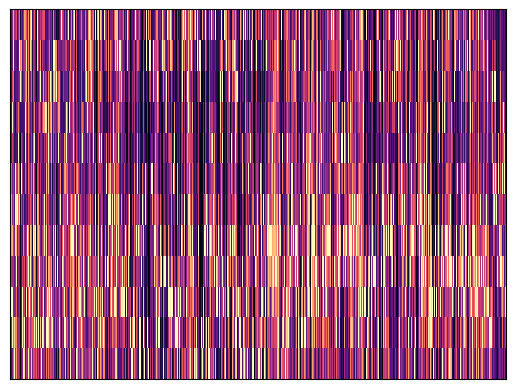

In [9]:
librosa.display.specshow(chroma_stft, hop_length=hop_length)